In [1]:
import gym
import matplotlib.pyplot as plt
import random
import numpy as np
from gridworld.gridworld import GridWorldEnvNew

env = gym.make('MyGridworld-v2')
store_state = {}
store_action = {}
store_reward = {}
store_qfunc = {}
total_reward = []

## Start of the algorithm
no_episodes = 50
episode_len = 200
#alpha = 0.001
#gamma = 0.6
#epsilon = 0.01

env.seed(76)
qfunc = np.zeros([env.observation_space.n, env.action_space.n])

for i_episode in range(no_episodes):

    ## Intialize the arrays for storing state, action and reward
    store_state[str(i_episode)] = []
    store_action[str(i_episode)] = []
    store_reward[str(i_episode)] = []
    store_qfunc[str(i_episode)] = []
    
    ### Initialize the episode with random state
    init_state, cur_pos = env.reset()
    print('Reset state: ', init_state)
    
    for t in range(episode_len):
        ### reduce the learning after certain episode length
        if (t<episode_len/2.0):
            alpha = 0.1
            gamma = 0.4
            epsilon = 0.1
        else: 
            alpha = 0.001
            gamma = 0.2
            epsilon = 0.01
        
        ### epsilon_greedy algorithm for A action
        myprob = random.uniform(0, 1) 
        if myprob < epsilon:
            print('Random action executed')
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(qfunc[cur_pos]) 
        # Exploit learned values env.action_space.sample()  # 
            
        store_action[str(i_episode)].append(action)
        next_state, reward, done, info = env.step(action)
        
        next_pos = info['pos'] ## S'
        cur_q = qfunc[cur_pos, action] ## Q(S,A)        
        next_q = np.max(qfunc[next_pos]) ## A' = max_a Q(S',a)
        
        ### Q(S,A) = Q(S,A) + alpha( R + gamma*Q(S',A')-Q(S,A) )
        q_val = (1 - alpha) * cur_q + alpha * (reward + gamma * next_q)
        qfunc[cur_pos, action] = q_val ## Q (S,A)
        
        cur_pos = next_pos ## S<--S'
        ### Plotting and Storing
        print(" ")
        print("Action: ", action)     
        print("Reward: ", reward)
        print("State:  ", next_pos, next_state)
        store_state[str(i_episode)].append(next_pos)
        store_reward[str(i_episode)].append(reward)
        env.render()
    
    store_qfunc[str(i_episode)] = qfunc
    total_reward.append(sum(store_reward[str(i_episode)]))

env.close()

Reset state:  [3, 1]
 
Action:  0
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  0
Reward:  -1.0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  0
Reward:  -1.0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  0
Reward:  -1.0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  0
Reward:  -1.0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  1
Reward:  -1.0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  0
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Rewa

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   6 [1, 1]
00000
01000
00000
00000
00000
 
Action:  0
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2


 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:  

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  3
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:  

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   11 [2, 1]
00000
00000
01000
00000
00000
 
Action:  0
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State

Random action executed
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:  

 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:  

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Act

 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:  

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Reset state:  [1, 3]
 
Action:  0
Reward:  0
State:   7 [1, 2]
00000
00100
00000
00000
00000
 
Act

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  3
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  2
Reward:  0
State:   16 [3, 1]
00000
00000
00000
01000
00000
 
Action:  0
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Actio

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Reset state:  [3, 0]
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   1

 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
Stat

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  2
Reward:  0
State:  

 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  2
Reward:  0
State:   22 [4, 2]
00000
00000
00000
00000
00100
 
Action:  0
Reward:  0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  0
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Act

 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
000

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random a

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
Stat

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  3
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000

 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  3
Reward:  -1.0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  3
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  2
Reward:  0
State:   16 [3, 1]
00000
00000
00000
01000
00000
 
Action:  0
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
S

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000


Random action executed
 
Action:  3
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   6 [1, 1]
00000
01000
00000
00000
00000
 
Action:  0
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action: 

 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Reset state:  [4, 4]
 
Action:  0
Reward:  0
State:   23 [4, 3]
00000
00000
00000
00000
00010
 
Action:  0
Reward:  0
State:   

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  3
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Reset state:  [0, 4]
 
Action:  0
Reward:  0
State:   3 [0, 3]
00010
00000
00000
00000
00000
 
Action:  0
Reward:  5
State:   13 [2, 3]
00000
00000
00010
00000
00000
 
Action:  0
Reward:  0
State:   12 [2, 2]
00000
00000
00100
00000
00000
 
Action:  0
Reward:  0
State:   11 [2, 1]
00000
00000
01000
00000
00000
 
Action:  0
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:  

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   11 [2, 1]
00000
00000
01000
00000
00000
 
Action:  0
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   6 [1, 1]
00000
01000
00000
00000
00000
 
Action:  0
Reward:  0
State:   

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  1
Reward:  0
State:   16 [3, 1]
00000
00000
00000
01000
00000
 
Action:  0
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State: 

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  3
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
Random action executed
 
Action:  2
Reward:  0
State:   11 [2, 1]
00000
00000
01000
00000
00000
 
Action:  0
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:  

 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  1
Reward:  -1.0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  1
Reward:  0
State:   16 [3, 1]
00000
00000
00000
01000
00000
 
Actio

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  3
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Act

Random action executed
 
Action:  2
Reward:  0
State:   6 [1, 1]
00000
01000
00000
00000
00000
 
Action:  0
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action: 

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  2
Reward:  0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  0
Reward:  -1.0
State: 

 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  3
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State

 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  3
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State: 

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1

 
Action:  0
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
Reset state:  [1, 4]
 
Action:  0
Reward:  0
State:   8 [1, 3]
00000
00010
00000
00000
00000
 
Action:  0
Reward:  0
State:   7 [1, 2]
00000
00100
00000
00000
00000
 
Action:  0
Reward:  0
State:   6 [1, 1]
00000
01000
00000
00000
00000
 
Action:  0
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  3
Re

 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
Random action executed
 
Action:  3
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   

Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Reset state:  [2, 1]
 
Action:  0
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  3
Reward:  -1.0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward: 

 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  2
Reward:  0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action

 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  3
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
Stat

 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000


 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  0
Reward:  -1.0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  2
Reward:  0
State:   16 [3, 1]
00000
00000
00000
01000
00000
Rand

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:  

 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000


 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  2
Reward:  0
State:   16 [3, 1]
00000
00000
00000
01000
00000
 
Action:  0
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
Random action executed
 
Action:  3
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  0
Reward:  -1.0
State:   20 [4, 0]
00000
00000

 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
Random action executed
 
Action:  3
Reward:  -1.0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
Random action executed
 
Action:  2
Reward:  0
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Act

 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000


 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000


 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000
00000
00000
00000
 
Action:  2
Reward:  0
State:   1 [0, 1]
01000
00000
00000
00000
00000
 
Action:  0
Reward:  10
State:   21 [4, 1]
00000
00000
00000
00000
01000
 
Action:  0
Reward:  0
State:   20 [4, 0]
00000
00000
00000
00000
10000
 
Action:  1
Reward:  0
State:   15 [3, 0]
00000
00000
00000
10000
00000
 
Action:  1
Reward:  0
State:   10 [2, 0]
00000
00000
10000
00000
00000
 
Action:  1
Reward:  0
State:   5 [1, 0]
00000
10000
00000
00000
00000
 
Action:  1
Reward:  0
State:   0 [0, 0]
10000
00000


In [2]:
from matplotlib.table import Table

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    print('Image shape: ', image.shape)
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(nrows)):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(ncols)):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)

Image shape:  (25, 4)


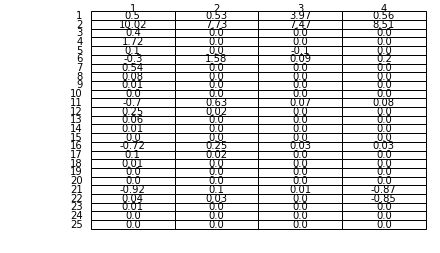

In [3]:
draw_image(np.round(qfunc, decimals=2))

Text(0.5,0,'Episode')

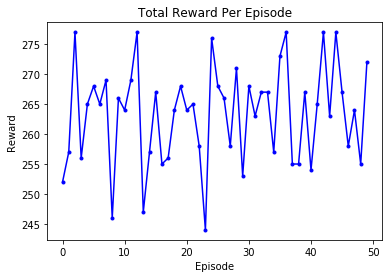

In [4]:
plt.plot(total_reward, 'b')
plt.plot(total_reward, 'b.')
plt.ylabel('Reward')
plt.title('Total Reward Per Episode')
plt.xlabel('Episode')

idx:  37


Text(0.5,1,'Reward obtained at each instant')

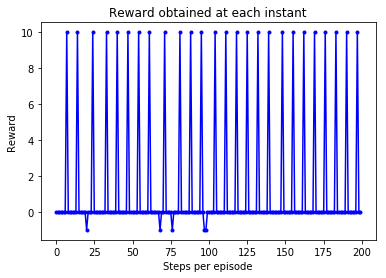

In [5]:
idx = random.randint(0,no_episodes)
print('idx: ', idx)
plt.plot(store_reward[str(idx)], 'b')
plt.plot(store_reward[str(idx)], 'b.')
plt.xlabel('Steps per episode')
plt.ylabel('Reward')
plt.title('Reward obtained at each instant')

Text(0.5,0,'Steps per episode')

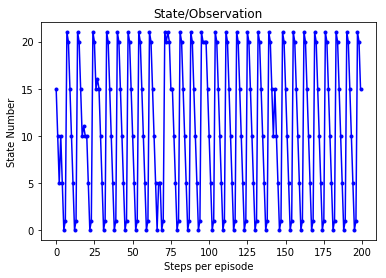

In [6]:
plt.plot(np.transpose(store_state[str(idx)]), 'b')
plt.plot(np.transpose(store_state[str(idx)]), 'b.')
plt.ylabel('State Number')
plt.title('State/Observation')
plt.xlabel('Steps per episode')

Text(0.5,0,'Steps per episode')

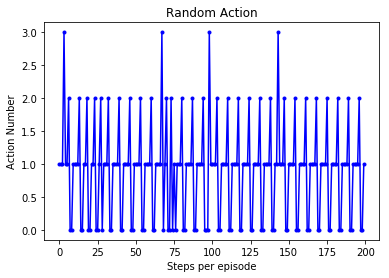

In [7]:
plt.plot(np.transpose(store_action[str(idx)]), 'b')
plt.plot(np.transpose(store_action[str(idx)]), 'b.')
plt.ylabel('Action Number')
plt.title('Random Action')
plt.xlabel('Steps per episode')
